# User Photos Experiment - casocha

## 1. Package Imports, Initial Data Read In, & Basic Data Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'C:\Users\casocha\Documents\Photos/userPhotos.csv')
df

,UserId,CountryShortName,IsTouchEnabled,FormFactor,NumberOfActiveDaysInPhotosApp,TotalLaunchCount,LaunchViaCropPicker,LaunchViaWindowsCameraRoll,LaunchViaLumiaCameraRoll,LaunchViaStorageSense,...,NumberOfRichMedia,TotalFilesInCollection,AgeGroup,Gender,NumberOfActiveDaysInOS,TotalTimeInAllAppsInMins,TotalTimeInAllPhotosAppsInMins,MostUsedPhotoApp,TotalTimeInPhotosAppInMins,TotalTimeInOtherPhotosAppsInMins
0,1,Bangladesh,False,NaN,1,2,0,0,0,0,...,0,1,NaN,NaN,16,3713,1,Photos,1,0.0
1,2,Ukraine,False,Notebook,2,3,0,0,0,0,...,0,175,[25-35),M,30,8740,1203,App116,0,1203.0
2,3,China,False,Desktop,1,1,0,0,0,0,...,0,5,NaN,NaN,28,12811,0,Photos,0,NaN
3,4,Slovakia,False,Notebook,2,5,0,0,0,0,...,0,196,>=50,M,16,1489,6,Photos,6,0.0
4,5,Morocco,False,Notebook,5,8,0,0,0,0,...,0,71,NaN,NaN,30,12296,17,Photos,8,8.0
5,6,United States,False,Desktop,1,3,0,0,0,0,...,0,10512,NaN,NaN,21,3138,1,App115,0,1.0
6,7,United States,True,LargeTablet,1,2,0,0,0,0,...,0,42,NaN,NaN,4,136,1,Photos,1,NaN
7,8,Chile,False,Notebook,19,183,0,0,0,0,...,0,0,[25-35),M,30,13963,61,Photos,61,NaN
8,9,United States,False,Desktop,3,6,0,0,0,0,...,0,574,[25-35),F,16,446,1,Photos,1,0.0
9,10,Singapore,True,Notebook,1,1,0,0,0,0,...,0,3226,NaN,NaN,19,5442,20,Photos,20,NaN


In [158]:
#df.isnull().values.any()
#df.describe()
#df.head()
#df.info()

In [159]:
df['FinalOneDriveSettingState'] = df['FinalOneDriveSettingState'].fillna('EnableOneDrive')
df['FinalDuplicateSettingState'] = df['FinalDuplicateSettingState'].fillna('EnableHideDuplicatedItems')
df['FinalEnhanceSettingState'] = df['FinalEnhanceSettingState'].fillna('EnableAutoEnhance')
df['FormFactor'] = df['FormFactor'].fillna('Other')

df[['FinalOneDriveSettingState','FinalDuplicateSettingState','FinalEnhanceSettingState']] = df[['FinalOneDriveSettingState','FinalDuplicateSettingState','FinalEnhanceSettingState']].astype('bool')

df[['IsTouchEnabled','FinalOneDriveSettingState','FinalDuplicateSettingState','FinalEnhanceSettingState']] = (df[['IsTouchEnabled','FinalOneDriveSettingState','FinalDuplicateSettingState','FinalEnhanceSettingState']]).astype(int)

#Get initial df count
df.shape

(71696, 50)

## 2. Replace null values

1. Sets the nulls in these 3 columns to default value from data description
    * FinalOneDriveSettingState default value = EnableOneDrive 
    * FinalDuplicateSettingState default value = EnableHideDuplicatedItems
    * FinalEnhanceSettingState default value = EnableAutoEnhance
2. Convert string values into numbers
3.  Unsure of what to replace nulls with in FormFactor & CountryShortName  
    * Null row count is low in both so I decided to drop the rows

In [160]:
#checks for null values
#df.FormFactor.isnull().sum()
#df.CountryShortName.isnull().sum()
#drops null rows
#df = df.dropna(subset=['FormFactor','CountryShortName'])
df = df.dropna(subset=['CountryShortName'])
#check if values properly dropped
df.shape

(71692, 50)

* Gets most frequent age group for each country 
* If all of the countries ages are null then replace with most frequent value in dataset 

In [161]:
s = df.groupby('CountryShortName')['AgeGroup'].value_counts().to_frame()
s = df.groupby('CountryShortName')['AgeGroup'].first().to_frame()
s['AgeGroup'] = s['AgeGroup'].fillna('[25-35)')

* Gets most frequent gender for each country
* If all of the countries genders are null then replace with most frequent value in dataset

In [162]:
s2 = df.groupby('CountryShortName')['Gender'].value_counts().to_frame()
s2 = df.groupby('CountryShortName')['Gender'].first().to_frame()
s2['Gender'] = s2['Gender'].fillna('M')

In [163]:
s3 = s.to_dict()
s3 = s3['AgeGroup']

s4 = s2.to_dict()
s4 = s4['Gender']

* Recalculated the total time in other photo apps based on available data & data descriptions
* Head print out to double check calculations

In [164]:
df['TotalTimeInOtherPhotosAppsInMins'] = df['TotalTimeInAllPhotosAppsInMins'] - df['TotalTimeInPhotosAppInMins']   
df[['TotalTimeInAllPhotosAppsInMins','TotalTimeInPhotosAppInMins','TotalTimeInOtherPhotosAppsInMins']].head(10)

,TotalTimeInAllPhotosAppsInMins,TotalTimeInPhotosAppInMins,TotalTimeInOtherPhotosAppsInMins
0,1,1,0
1,1203,0,1203
2,0,0,0
3,6,6,0
4,17,8,9
5,1,0,1
6,1,1,0
7,61,61,0
8,1,1,0
9,20,20,0


* Replaced nulls with most common age group & gender for each country 
* Demographically figured this would be the closest 

In [165]:
df['AgeGroup']=df['AgeGroup'].fillna('0')
df['Gender']=df['Gender'].fillna('0')
def replace_na(df, my_dict, col):
    my_list = []
    for index, row in df.iterrows():
        if row[col] == '0':
            my_list.append(my_dict[row['CountryShortName']])
        else:
            my_list.append(row[col])
    return my_list

df['AgeGroup'] = replace_na(df, s3, 'AgeGroup')
df['Gender'] = replace_na(df,s4,'Gender')

# 3. EDA

### Answer 1: Quartile values for Total Time in Apps, Photo Apps, & Other Apps

In [166]:
from scipy import stats
df_outlier_updated = df[(np.abs(stats.zscore(df['TotalTimeInOtherPhotosAppsInMins'])) < 3)]
df_outlier_updated = df_outlier_updated[(np.abs(stats.zscore(df_outlier_updated['TotalTimeInAllPhotosAppsInMins'])) < 3)]
df_outlier_updated = df_outlier_updated[(np.abs(stats.zscore(df_outlier_updated['TotalTimeInPhotosAppInMins'])) < 3)]
df_outlier_updated.shape

(68374, 50)

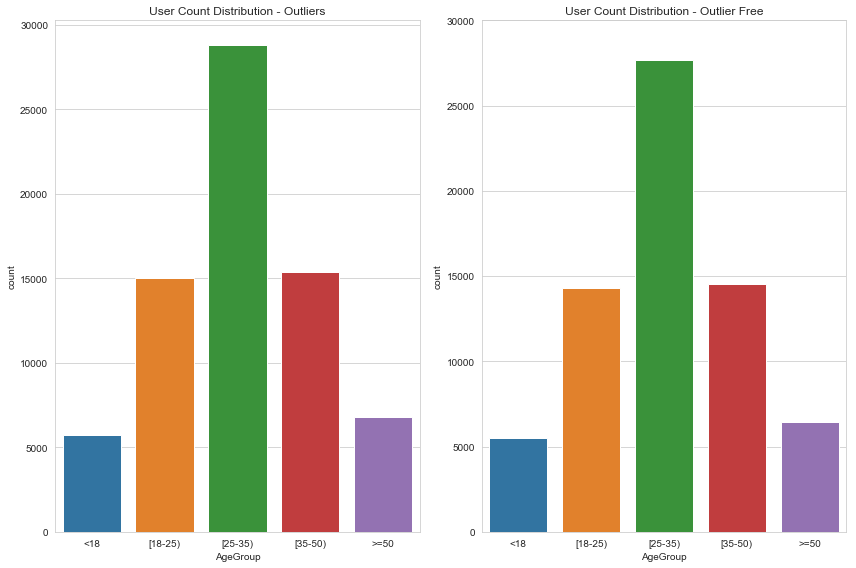

In [167]:
fig, axarr = plt.subplots(nrows = 1, ncols=2, figsize=(12, 8))

sns.catplot(x="AgeGroup", data=df, kind = 'count', ax=axarr[0],order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'])
axarr[0].set_title('User Count Distribution - Outliers')

sns.catplot(x="AgeGroup", data=df_outlier_updated, kind = 'count', ax=axarr[1],order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'])
axarr[1].set_title('User Count Distribution - Outlier Free')
plt.close(2)
plt.close(3)
plt.ylim(ymax=30000)
plt.tight_layout()

In [168]:
quartile = df.TotalTimeInAllPhotosAppsInMins.quantile([0.25,0.5,0.75])
quartile1 = df_outlier_updated.TotalTimeInAllPhotosAppsInMins.quantile([0.25,0.5,0.75])

print(quartile,quartile1)

0.25     1.0
0.50     8.0
0.75    36.0
Name: TotalTimeInAllPhotosAppsInMins, dtype: float64 0.25     1.0
0.50     7.0
0.75    29.0
Name: TotalTimeInAllPhotosAppsInMins, dtype: float64


In [169]:
photodf = df[df['TotalTimeInPhotosAppInMins'] > df['TotalTimeInOtherPhotosAppsInMins']]
otherdf = df[df['TotalTimeInPhotosAppInMins'] < df['TotalTimeInOtherPhotosAppsInMins']]
photodf1 = df_outlier_updated[df_outlier_updated['TotalTimeInPhotosAppInMins'] > df_outlier_updated['TotalTimeInOtherPhotosAppsInMins']]
otherdf1 = df_outlier_updated[df_outlier_updated['TotalTimeInPhotosAppInMins'] < df_outlier_updated['TotalTimeInOtherPhotosAppsInMins']]

photoquartile = photodf.TotalTimeInPhotosAppInMins.quantile([0.25,0.5,0.75])
photoquartile1 = photodf1.TotalTimeInPhotosAppInMins.quantile([0.25,0.5,0.75])

print(photoquartile, photoquartile1)

0.25     3.0
0.50     8.0
0.75    24.0
Name: TotalTimeInPhotosAppInMins, dtype: float64 0.25     3.0
0.50     8.0
0.75    21.0
Name: TotalTimeInPhotosAppInMins, dtype: float64


In [170]:
otherquartile = photodf.TotalTimeInOtherPhotosAppsInMins.quantile([0.25,0.5,0.75])
otherquartile1 = photodf1.TotalTimeInOtherPhotosAppsInMins.quantile([0.25,0.5,0.75])
print(otherquartile, otherquartile1)

0.25    0.0
0.50    0.0
0.75    1.0
Name: TotalTimeInOtherPhotosAppsInMins, dtype: float64 0.25    0.0
0.50    0.0
0.75    0.0
Name: TotalTimeInOtherPhotosAppsInMins, dtype: float64


* Data is heavily skewed towards non users. Photo apps appears to have slightly more use which makes sense since it is the default app

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


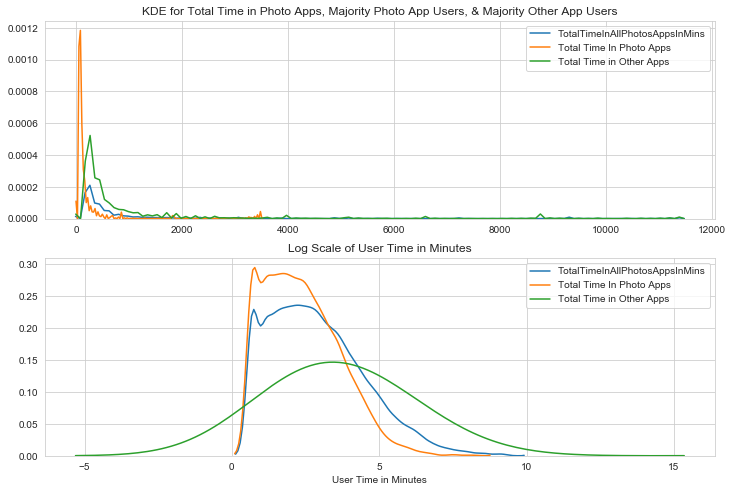

In [171]:
df_dist = df[df['TotalTimeInAllPhotosAppsInMins'] > 0 ]
df_dist_new = photodf[df['TotalTimeInPhotosAppInMins'] > 0]
df_other_new = otherdf[df['TotalTimeInOtherPhotosAppsInMins'] > 0]

fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

sns.kdeplot(df['TotalTimeInAllPhotosAppsInMins'], ax=axarr[0])
sns.kdeplot(photodf['TotalTimeInPhotosAppInMins'], bw=.2, label="Total Time In Photo Apps ", ax=axarr[0])
sns.kdeplot(otherdf['TotalTimeInOtherPhotosAppsInMins'], bw=2, label="Total Time in Other Apps", ax=axarr[0])
axarr[0].set_title('KDE for Total Time in Photo Apps, Majority Photo App Users, & Majority Other App Users')
axarr[1].set_xlabel('User Time in Minutes')

sns.kdeplot(np.log1p(df_dist['TotalTimeInAllPhotosAppsInMins']), ax=axarr[1])
sns.kdeplot(np.log1p(df_dist_new['TotalTimeInPhotosAppInMins']), bw=.2, label="Total Time In Photo Apps ", ax=axarr[1])
sns.kdeplot(np.log1p(df_other_new['TotalTimeInOtherPhotosAppsInMins']), bw=2, label="Total Time in Other Apps", ax=axarr[1])
axarr[1].set_title('Log Scale of User Time in Minutes')

* Photo apps may have slightly more usage but other apps have higher levels of engagement. 

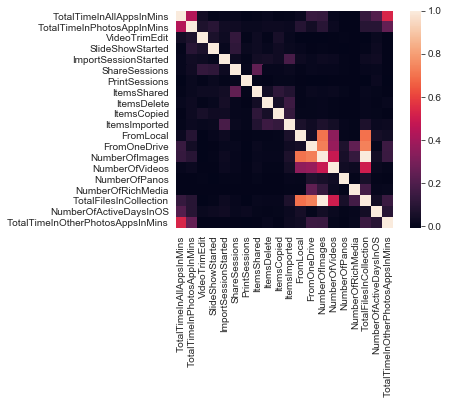

In [172]:
wh1 = df[['TotalTimeInAllAppsInMins','TotalTimeInPhotosAppInMins',
    'VideoTrimEdit',
'SlideShowStarted',
'ImportSessionStarted',
'ShareSessions',
'PrintSessions',
'ItemsShared',
'ItemsDelete',
'ItemsCopied',
'ItemsImported',
'FromLocal',
'FromOneDrive',
'NumberOfImages',
'NumberOfVideos',
'NumberOfPanos',
'NumberOfRichMedia',
'TotalFilesInCollection',
'NumberOfActiveDaysInOS',
    'TotalTimeInOtherPhotosAppsInMins']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

* Doesnt appear to be any strong correlations in the features to total time using the photo apps besides total times in all apps

In [173]:
#create outlier free individual columns 
df_outlier_free = df[(np.abs(stats.zscore(df['TotalTimeInOtherPhotosAppsInMins'])) < 3)]
df_outlier_freed = df[(np.abs(stats.zscore(df['TotalTimeInPhotosAppInMins'])) < 3)]
df_outlier_freedd = df[(np.abs(stats.zscore(df['TotalTimeInAllPhotosAppsInMins'])) < 3)]

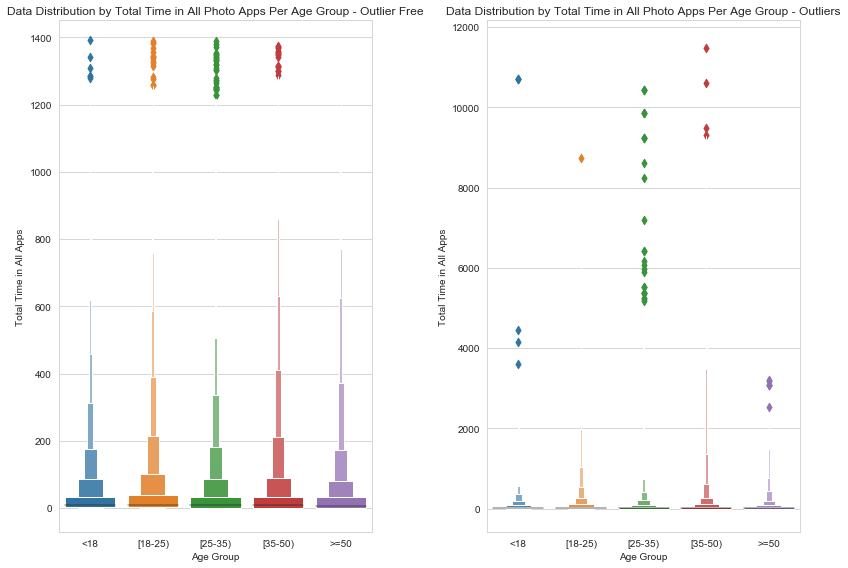

In [229]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

sns.catplot(x="AgeGroup", y="TotalTimeInAllPhotosAppsInMins", kind="boxen",
            data=df_outlier_freedd.sort_values("AgeGroup"),order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[0]);
axarr[0].set_title("Data Distribution by Total Time in All Photo Apps Per Age Group - Outlier Free")
axarr[0].set_xlabel('Age Group')
axarr[0].set_ylabel('Total Time in All Apps')
axarr[0].set_ylim(ymax=1450)

sns.catplot(x="AgeGroup", y="TotalTimeInAllPhotosAppsInMins", kind="boxen",
            data=df.sort_values("AgeGroup"),order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[1]);
axarr[1].set_title('Data Distribution by Total Time in All Photo Apps Per Age Group - Outliers')
axarr[1].set_xlabel('Age Group')
axarr[1].set_ylabel('Total Time in All Apps')

plt.close(2)
plt.close(3)
plt.tight_layout()
#plt.yscale('log')
plt.show()

* 18-25, 35-50, & >= 50 seem to be highest users overall
* Relatively consisent overall but 25-35 has a decisive advantage in amount of people - probably why there are so many outliers in original graph
    * But they seem to be less engaged in either of the apps 

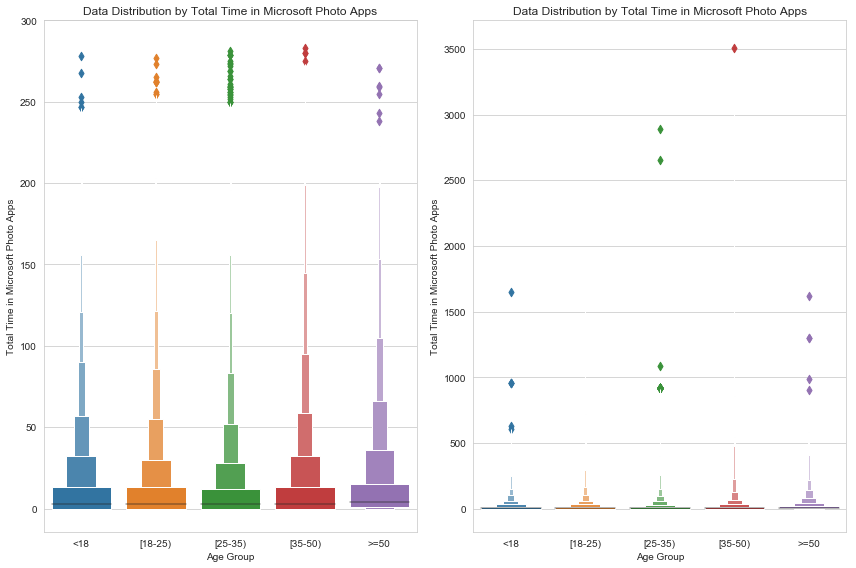

In [175]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

sns.catplot(x="AgeGroup", y="TotalTimeInPhotosAppInMins", kind="boxen",
            data=df_outlier_freed.sort_values("AgeGroup"),order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[0]);
axarr[0].set_title("Data Distribution by Total Time in Microsoft Photo Apps")
axarr[0].set_xlabel('Age Group')
axarr[0].set_ylabel('Total Time in Microsoft Photo Apps')
axarr[0].set_ylim(ymax=300)

sns.catplot(x="AgeGroup", y="TotalTimeInPhotosAppInMins", kind="boxen",
            data=df.sort_values("AgeGroup"),order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[1]);
axarr[1].set_title("Data Distribution by Total Time in Microsoft Photo Apps")
axarr[1].set_xlabel('Age Group')
axarr[1].set_ylabel('Total Time in Microsoft Photo Apps')


plt.close(2)
plt.close(3)
plt.tight_layout()
#plt.yscale('log')
plt.show()

* 50 >= was most affected by outliers. They still have some of the highest photo apps usage but it is slightly overtaken by 35-50 & 18-25

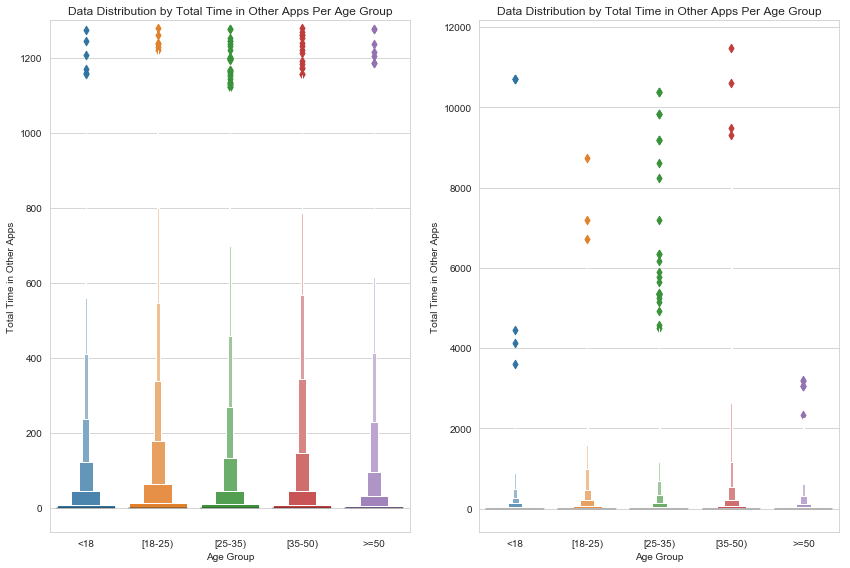

In [176]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
sns.catplot(x="AgeGroup", y="TotalTimeInOtherPhotosAppsInMins", kind="boxen",
            data=df_outlier_free.sort_values("AgeGroup"),order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[0]);
axarr[0].set_title("Data Distribution by Total Time in Other Apps Per Age Group")
axarr[0].set_xlabel('Age Group')
axarr[0].set_ylabel('Total Time in Other Apps')
axarr[0].set_ylim(ymax=1300)

sns.catplot(x="AgeGroup", y="TotalTimeInOtherPhotosAppsInMins", kind="boxen",
            data=df.sort_values("AgeGroup"),order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[1]);
axarr[1].set_title("Data Distribution by Total Time in Other Apps Per Age Group")
axarr[1].set_xlabel('Age Group')
axarr[1].set_ylabel('Total Time in Other Apps')

plt.close(2)
plt.close(3)
plt.tight_layout()
#plt.yscale('log')
plt.show()

* 35-50 is most affected by removal of outliers - some in this age group had really high usage - probably professionals 
* >= 50 still has among the lowest other apps usage. 
* 18-25 has overtaken the 35-50 age group - photo editing casual vs. professional? 
* 18 to less than 50 Age Groups were the highest users in general 

In [177]:
df_age = df.groupby('AgeGroup')['TotalTimeInAllAppsInMins','TotalTimeInPhotosAppInMins',
                                          'TotalTimeInOtherPhotosAppsInMins'
                                          ,'TotalTimeInAllPhotosAppsInMins','NumberOfImages','NumberOfVideos',
                                         'NumberOfActiveDaysInOS','FromLocal','FromOneDrive'].apply(lambda x : x.astype(int).sum())
df202=df['AgeGroup'].value_counts().sort_index().to_frame()
df_age['total_people'] = df202['AgeGroup']
df212 = df.groupby('AgeGroup')['MostUsedPhotoApp'].value_counts().to_frame()
df212 = df.groupby('AgeGroup')['MostUsedPhotoApp'].first().to_frame()
df_age['Most_Used'] = df212['MostUsedPhotoApp']

df_age = df_age.reset_index()
df_age['Average_Days'] = df_age['NumberOfActiveDaysInOS'] / df_age['total_people']
df_age['Average_All_Apps'] = df_age['TotalTimeInAllAppsInMins'] / df_age['total_people']
df_age['Average_Photos'] = df_age['TotalTimeInPhotosAppInMins'] / df_age['total_people']
df_age['Average_Total_Photo'] = df_age['TotalTimeInAllPhotosAppsInMins'] / df_age['total_people']
df_age['Average_Others'] = df_age['TotalTimeInOtherPhotosAppsInMins'] / df_age['total_people']
df_age['Average_Pics'] = df_age['NumberOfImages'] / df_age['total_people']
df_age['Average_OneDrive'] = df_age['FromOneDrive'] / df_age['total_people']
df_age['Average_Local'] = df_age['FromLocal'] / df_age['total_people']
df_age['Photo_Other_Deficit'] = (df_age['Average_Photos'] - df_age['Average_Others']) / (df_age['Average_Photos'] + df_age['Average_Others'])
df_age['Local_One_Drive_Deficit'] = (df_age['Average_OneDrive'] - df_age['Average_Local']) / (df_age['Average_OneDrive'] + df_age['Average_Local'])
df_age.head(20)

,AgeGroup,TotalTimeInAllAppsInMins,TotalTimeInPhotosAppInMins,TotalTimeInOtherPhotosAppsInMins,TotalTimeInAllPhotosAppsInMins,NumberOfImages,NumberOfVideos,NumberOfActiveDaysInOS,FromLocal,FromOneDrive,...,Average_Days,Average_All_Apps,Average_Photos,Average_Total_Photo,Average_Others,Average_Pics,Average_OneDrive,Average_Local,Photo_Other_Deficit,Local_One_Drive_Deficit
0,<18,38260227,96543,242399,338942,3590895,74848,109341,2818602,785187,...,19.102201,6684.176625,16.866352,59.214186,42.347834,627.340147,137.174528,492.418239,-0.430327,-0.564244
1,>=50,70658370,154521,272921,427442,13729627,216957,125331,8974294,4585909,...,18.493581,10426.201859,22.800797,63.072451,40.271654,2025.915154,676.687177,1324.228125,-0.276997,-0.323622
2,[18-25),122998526,298869,1038227,1337096,15532483,292020,286372,9887136,5431818,...,19.100380,8203.730141,19.933902,89.181351,69.247449,1035.982325,362.290269,659.450143,-0.552958,-0.290837
3,[25-35),182670493,476126,1540622,2016748,32440226,653606,527038,19685955,12167291,...,18.287231,6338.323838,16.520680,69.977377,53.456697,1125.615059,422.182200,683.065753,-0.527828,-0.236041
4,[35-50),145947438,379907,1470115,1850022,32901656,611083,286956,14883688,16707933,...,18.660164,9490.664456,24.704578,120.303160,95.598582,2139.527637,1086.482833,967.855898,-0.589295,0.057745


* Age seems to have an impact on which app is used
* 35-50 has highest total photo app usage but barely uses Photo Apps
* Users seem to favor other apps than Photo Apps 
* 50+ spends far more time in Photo apps than other groups

In [178]:
df_age1 = df_outlier_updated.groupby('AgeGroup')['TotalTimeInAllAppsInMins','TotalTimeInPhotosAppInMins',
                                          'TotalTimeInOtherPhotosAppsInMins'
                                          ,'TotalTimeInAllPhotosAppsInMins','NumberOfImages','NumberOfVideos',
                                         'NumberOfActiveDaysInOS','FromLocal','FromOneDrive'].apply(lambda x : x.astype(int).sum())
df202=df_outlier_updated['AgeGroup'].value_counts().sort_index().to_frame()
df_age1['total_people'] = df202['AgeGroup']
df212 = df_outlier_updated.groupby('AgeGroup')['MostUsedPhotoApp'].value_counts().to_frame()
df212 = df_outlier_updated.groupby('AgeGroup')['MostUsedPhotoApp'].first().to_frame()
df_age1['Most_Used'] = df212['MostUsedPhotoApp']

df_age1 = df_age1.reset_index()
df_age1['Average_Days'] = df_age1['NumberOfActiveDaysInOS'] / df_age1['total_people']
df_age1['Average_All_Apps'] = df_age1['TotalTimeInAllAppsInMins'] / df_age1['total_people']
df_age1['Average_Photos'] = df_age1['TotalTimeInPhotosAppInMins'] / df_age1['total_people']
df_age1['Average_Total_Photo'] = df_age1['TotalTimeInAllPhotosAppsInMins'] / df_age1['total_people']
df_age1['Average_Others'] = df_age1['TotalTimeInOtherPhotosAppsInMins'] / df_age1['total_people']
df_age1['Average_Pics'] = df_age1['NumberOfImages'] / df_age1['total_people']
df_age1['Average_OneDrive'] = df_age1['FromOneDrive'] / df_age1['total_people']
df_age1['Average_Local'] = df_age1['FromLocal'] / df_age1['total_people']
df_age1['Photo_Other_Deficit'] = (df_age1['Average_Photos'] - df_age1['Average_Others']) / (df_age1['Average_Photos'] + df_age1['Average_Others'])
df_age1['Local_One_Drive_Deficit'] = (df_age1['Average_OneDrive'] - df_age1['Average_Local']) / (df_age1['Average_OneDrive'] + df_age1['Average_Local'])
df_age1.head(20)

,AgeGroup,TotalTimeInAllAppsInMins,TotalTimeInPhotosAppInMins,TotalTimeInOtherPhotosAppsInMins,TotalTimeInAllPhotosAppsInMins,NumberOfImages,NumberOfVideos,NumberOfActiveDaysInOS,FromLocal,FromOneDrive,...,Average_Days,Average_All_Apps,Average_Photos,Average_Total_Photo,Average_Others,Average_Pics,Average_OneDrive,Average_Local,Photo_Other_Deficit,Local_One_Drive_Deficit
0,<18,33714740,61533,106066,167599,3441383,72415,104095,2697362,754518,...,18.898874,6121.049383,11.171569,30.428286,19.256718,624.797204,136.985839,489.717139,-0.265712,-0.562836
1,>=50,36947576,77019,93621,170640,12442787,203508,116748,8077257,4213168,...,18.156765,5746.123795,11.978072,26.538103,14.560031,1935.114619,655.236081,1256.183048,-0.097293,-0.314398
2,[18-25),94451701,153739,339508,493247,14476004,279639,269017,9091999,5191379,...,18.847965,6617.508653,10.771316,34.558047,23.786730,1014.222938,363.720241,637.006866,-0.376625,-0.273088
3,[25-35),152629640,286650,567233,853883,30457317,623348,501525,18368601,11537866,...,18.135713,5519.260866,10.365589,30.877378,20.511789,1101.371122,417.222319,664.229442,-0.328597,-0.228403
4,[35-50),75102063,156328,286754,443082,27476032,543549,265665,12515214,14203858,...,18.310359,5176.239782,10.774554,30.538424,19.763871,1893.723344,978.968778,862.582811,-0.294361,0.063200


* **Updated**
* 18-25, 50+ & 35-50 average time in all apps drops dramatically without outliers while average days stays close to constant
* 50+ still spends most average time in photo apps while spending least amount of time in all photo apps & other photo apps
* 35-50 has highest drops across the board. 
* Average time spent in photo apps is relatively consisent across Age groups - noticed graphically as well 
* < 18 groups total photo app usage dropped the least. Photo app usage was close between outliers & non, 16.8 to 11 but the average time in other dropped dramatically from 41 to 19.  
* Photo deficit for 35-50 & 18 < halved, 50+ by 2/3s. 

### Initial thoughts based on age groups: 
1. All the groups have similar computer usage habits - their Average Day calculations are roughly similar
2. 25-35 year olds have a decisive advantage in amount of people. They also seem to be the main group not using the regular Photo App.
3. 35-50 & 50+ year olds spend significantly more time in the apps than the younger segments & store more photos - potentially due to a larger emphasis on mobile among the youth
4. All the groups predominatly use other photo apps 
5. 50+ has the smallest deficit & the second largest amount of pic storage - worth investigating 
6. 18-50 appear roughly similar when it comes to photo or non photo app usage

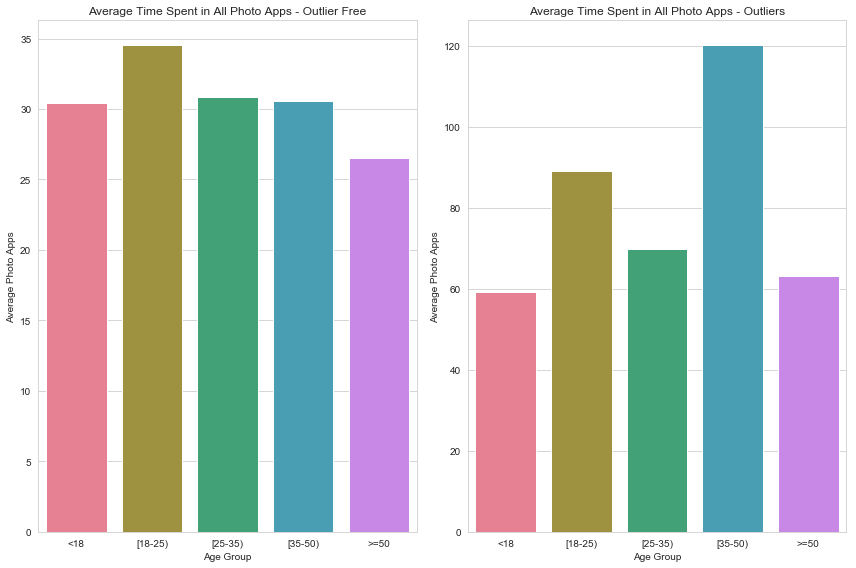

In [179]:
age_color = sns.color_palette("husl", 5)    

fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].set_title("Average Time Spent in All Photo Apps - Outlier Free")
sns.barplot(x="AgeGroup", y="Average_Total_Photo", data=df_age1,palette=age_color,
                order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[0])
axarr[0].set_xlabel('Age Group')
axarr[0].set_ylabel('Average Photo Apps')

axarr[1].set_title("Average Time Spent in All Photo Apps - Outliers")
sns.barplot(x="AgeGroup", y="Average_Total_Photo", data=df_age,palette=age_color,
                order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[1])
axarr[1].set_xlabel('Age Group')
axarr[1].set_ylabel('Average Photo Apps')

plt.close(2)
plt.close(3)
plt.tight_layout()
#plt.yscale('log')
plt.show()

* After accounting for outliers the 18-25 group is actually the highest user of total photo apps 

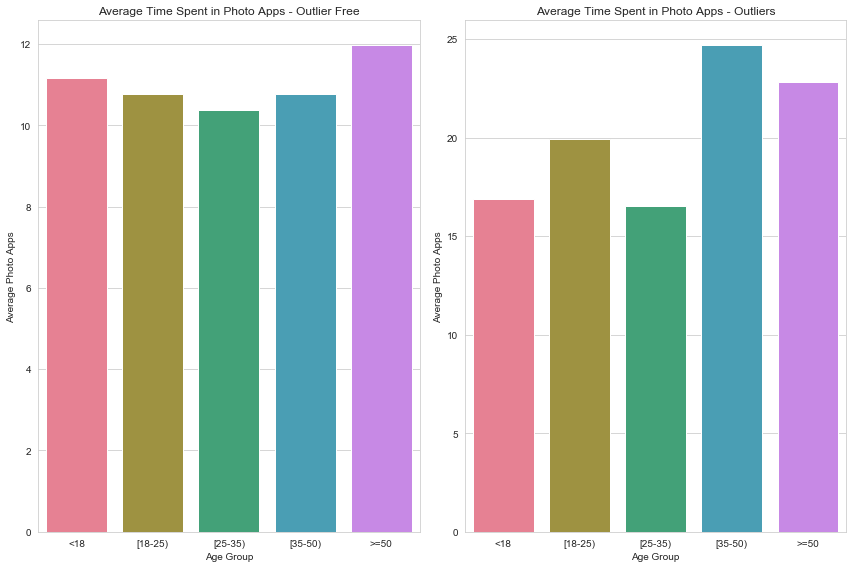

In [180]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].set_title("Average Time Spent in Photo Apps - Outlier Free")
sns.barplot(x="AgeGroup", y="Average_Photos", data=df_age1,palette=age_color,
                order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[0])
axarr[0].set_xlabel('Age Group')
axarr[0].set_ylabel('Average Photo Apps')

axarr[1].set_title("Average Time Spent in Photo Apps - Outliers")
sns.barplot(x="AgeGroup", y="Average_Photos", data=df_age,palette=age_color,
                order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[1])
axarr[1].set_xlabel('Age Group')
axarr[1].set_ylabel('Average Photo Apps')

plt.close(2)
plt.close(3)
plt.tight_layout()
#plt.yscale('log')
plt.show()

* >= 50 now has highest avg usage but was already in 2nd. 35-50 continues to be hit by lack of outliers
* < 18 surprisingly has the second highest usage 

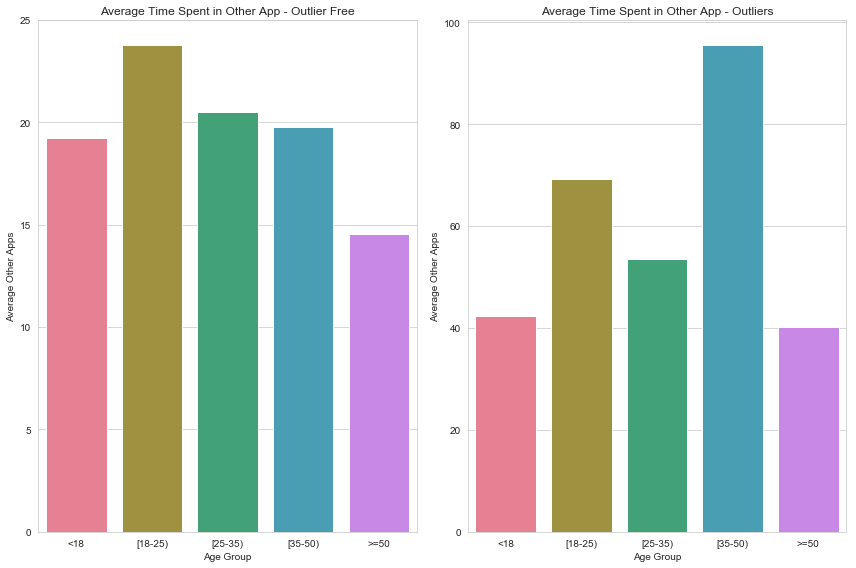

In [181]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].set_title("Average Time Spent in Other App - Outlier Free")
sns.barplot(x="AgeGroup", y="Average_Others", data=df_age1,palette=age_color,
                order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[0])
axarr[0].set_xlabel('Age Group')
axarr[0].set_ylabel('Average Other Apps')

axarr[1].set_title("Average Time Spent in Other App - Outliers")
sns.barplot(x="AgeGroup", y="Average_Others", data=df_age,palette=age_color,
                order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[1])
axarr[1].set_xlabel('Age Group')
axarr[1].set_ylabel('Average Other Apps')

plt.close(2)
plt.close(3)
plt.tight_layout()
#plt.yscale('log')
plt.show()

* Graphics confirm that the 35-50 segment is most likely to spend time in other photo apps. 
* 50+ segment almost matches 35-50 in photo app usage but are less likely to install / use another app. 
     * Note that the graph scales are different so there is considerably more usage of non photo apps. 
* **Updated**
* After accounting for outliers the 18-25 group is actually the highest user of total photo apps 
    * They're also more likely to use another app
* 50+ has the lowest total usage but is much more likely to use photo apps than other apps still 
* < 18 has second highest photo apps usage versus other apps - saw this in the table data as well 
* 35-50 was most affected by the removal of outliers - they are relatively average in general but spend 3rd highest time in photo apps & 3rd least in other apps 

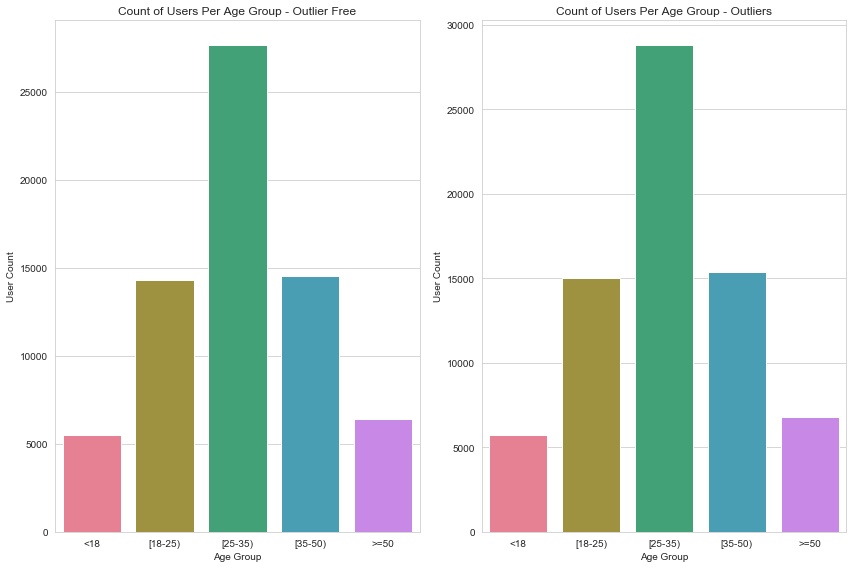

In [182]:
fig, axarr = plt.subplots(nrows = 1, ncols=2, figsize=(12, 8))

axarr[0].set_title("Count of Users Per Age Group - Outlier Free")
sns.barplot(x = 'AgeGroup',y="total_people", 
                data=df_age1,palette=age_color,order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[0])
axarr[0].set_xlabel('Age Group')
axarr[0].set_ylabel('User Count')

axarr[1].set_title("Count of Users Per Age Group - Outliers")
sns.barplot(x = 'AgeGroup',y="total_people", 
                data=df_age,palette=age_color,order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'],ax=axarr[1])
axarr[1].set_xlabel('Age Group')
axarr[1].set_ylabel('User Count')
plt.close(2)
plt.close(3)
plt.tight_layout()

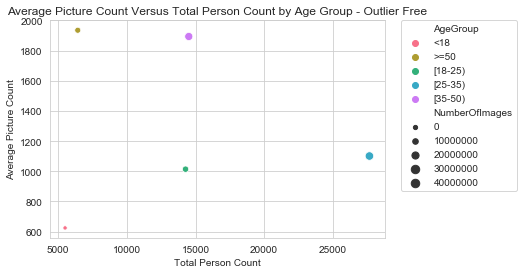

In [183]:
sns.set_style('whitegrid')
plt.title("Average Picture Count Versus Total Person Count by Age Group - Outlier Free")
sns.scatterplot(x = 'total_people',y="Average_Pics", 
                hue = 'AgeGroup',data=df_age1,size='NumberOfImages', palette=age_color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Total Person Count')
plt.ylabel('Average Picture Count')

* 25-35 is the largest group of people but is average for picture storage
* Greater than 50 Age group is second smallest but has second highest average storage count. They're probably primarily using it as storage
* **Updated**
* Doesn't seem to be major difference between outlier & outlier free. 
* 35-50 now has second highest photo count. >= 50 group has has by highest count with least amount of people

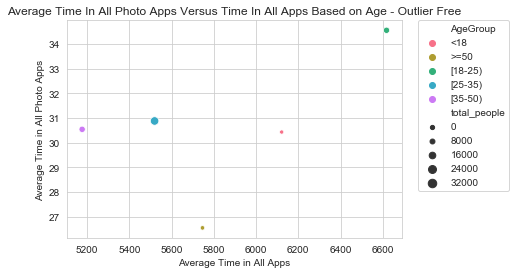

In [184]:
sns.set_style('whitegrid')
plt.title("Average Time In All Photo Apps Versus Time In All Apps Based on Age - Outlier Free")
sns.scatterplot(x = 'Average_All_Apps',y="Average_Total_Photo", 
                hue = 'AgeGroup',data=df_age1, size='total_people', palette=age_color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Average Time in All Apps')
plt.ylabel('Average Time in All Photo Apps')

* Major differences in this graph. 18 - 25 now spends most time in all apps & photo apps
* Greater than 50 now spends much 3rd least time in all apps versus first w/ outliers 
* < 18 went from lowest level of engagement to second highest 
* Average time spent on computers heavily skews young

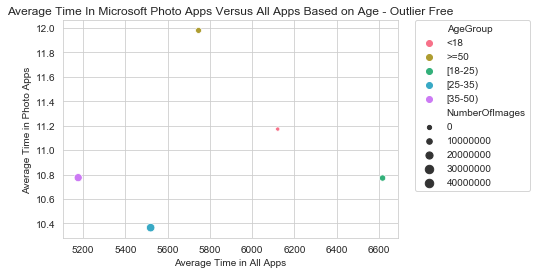

In [185]:
plt.title("Average Time In Microsoft Photo Apps Versus All Apps Based on Age - Outlier Free")
sns.scatterplot(x = 'Average_All_Apps',y="Average_Photos", 
                hue = 'AgeGroup',data=df_age1,palette=age_color,size='NumberOfImages')
plt.xlabel('Average Time in All Apps')
plt.ylabel('Average Time in Photo Apps')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* Greater than 50 and  > 18 continue to have usage relative to time in all apps 
* 50 > spends far more time in photo apps relative to all apps than other age groups

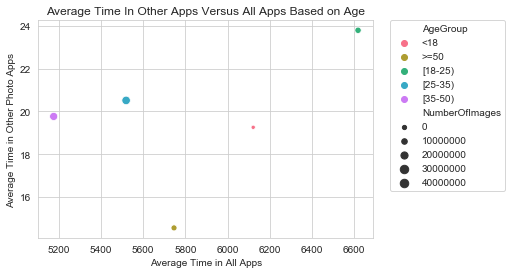

In [186]:
plt.title("Average Time In Other Apps Versus All Apps Based on Age")
sns.scatterplot(x = 'Average_All_Apps',y="Average_Others", 
                hue = 'AgeGroup',data=df_age1,palette=age_color,size='NumberOfImages')
plt.xlabel('Average Time in All Apps')
plt.ylabel('Average Time in Other Photo Apps')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* 35-50 more likely to use other apps & have low all app usage. 
* Greater than 50 has low usage but mid all app usage
* Usage in general trends young
* Less than 18 has high app usage but doesn't use other apps as much

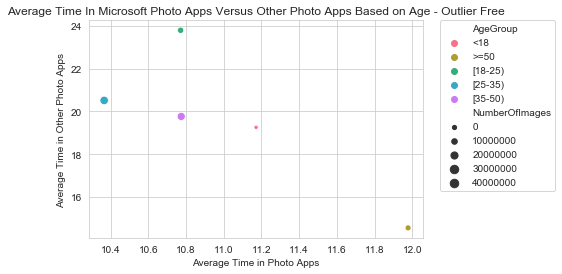

In [187]:
plt.title("Average Time In Microsoft Photo Apps Versus Other Photo Apps Based on Age - Outlier Free")
sns.scatterplot(x = 'Average_Photos',y="Average_Others", 
                hue = 'AgeGroup',data=df_age1,palette=age_color,size='NumberOfImages')
plt.xlabel('Average Time in Photo Apps')
plt.ylabel('Average Time in Other Photo Apps')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* The following graphics confirm that the 50+ & 35-50 are the highest users of photo apps.
* 35-50 group has a high average picture count & other app usage - this group probably contains photo professionals
* They all spend more time in other apps but the 50+ are most likely to use the photo apps
* 25-35 group seems to store a similar # of images to 35-50 but this group has a large total person advantage.

* **Updated**
* Less than 18 is now second highest photo apps users & second lowest other apps 

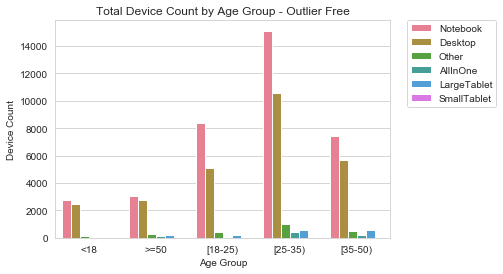

In [188]:
df_countyyy = df_outlier_updated.groupby(['AgeGroup'])['FormFactor'].value_counts()
df_countyyy.name = 'Form'

d = df_countyyy.to_frame()
d = d.reset_index()
age_color1 = sns.color_palette("husl", 6)    
with sns.axes_style("whitegrid"):
    plt.title("Total Device Count by Age Group - Outlier Free")
    sns.barplot(x="AgeGroup", y="Form", hue = 'FormFactor',data=d,palette=age_color1)
    plt.xlabel('Age Group')
    plt.ylabel('Device Count')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* 50+ and 35-50 are relatively split between desktops & notebooks. 
* To capture more of the 25-35 group it might be worth looking into the one drive usage. 
* Laptops can have limited storage so greater cloud integrations or a better cloud deal could help

* **Updated** 
* Not much change versus outliers

In [189]:
df_age_launcher = df_outlier_updated.groupby('AgeGroup')["TotalLaunchCount",
"LaunchViaCropPicker",
"LaunchViaWindowsCameraRoll",
"LaunchViaLumiaCameraRoll",
"LaunchViaStorageSense",
"LaunchViaDrmViewer",
"LaunchByImportProtocol",
"LaunchByImportContent",
"LaunchByTileAndTaskBar",
"LaunchBySearch",
"LaunchByFile",
"LaunchByProtocol",
"LaunchByFileOpenPicker",
"LaunchByDevice",
"LaunchByProtocolResults"].apply(lambda x : x.astype(int).sum())
df_age_launcher=df_age_launcher.reset_index()
df_age_launcher.head()

,AgeGroup,TotalLaunchCount,LaunchViaCropPicker,LaunchViaWindowsCameraRoll,LaunchViaLumiaCameraRoll,LaunchViaStorageSense,LaunchViaDrmViewer,LaunchByImportProtocol,LaunchByImportContent,LaunchByTileAndTaskBar,LaunchBySearch,LaunchByFile,LaunchByProtocol,LaunchByFileOpenPicker,LaunchByDevice,LaunchByProtocolResults
0,<18,111220,76,427,0,7,0,0,2,19706,0,89851,776,84,173,5
1,>=50,96903,156,166,0,57,0,1,28,14105,0,81317,147,122,719,9
2,[18-25),256249,175,1022,0,62,0,1,10,41972,0,210434,1534,160,552,25
3,[25-35),525442,365,1386,0,94,0,3,23,93159,0,425294,2787,332,1436,61
4,[35-50),246933,91,431,0,131,0,3,18,35884,0,207358,1031,342,1399,20


* One interesting thing to note is that the 50+ group launched the app the least but had some of the highest usage 

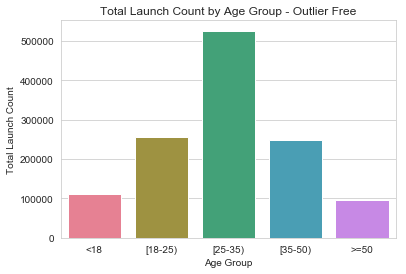

In [190]:
plt.title("Total Launch Count by Age Group - Outlier Free")
sns.barplot(x = 'AgeGroup',y="TotalLaunchCount", 
                data=df_age_launcher,palette=age_color,order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'])
plt.xlabel('Age Group')
plt.ylabel('Total Launch Count')

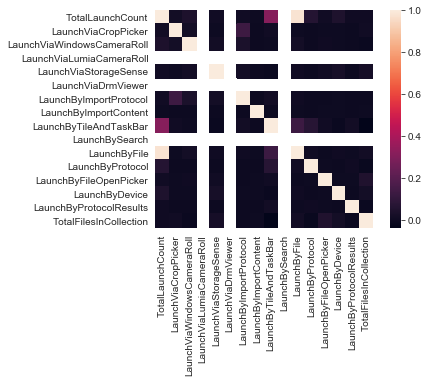

In [191]:
wh2 = df[["TotalLaunchCount",
"LaunchViaCropPicker",
"LaunchViaWindowsCameraRoll",
"LaunchViaLumiaCameraRoll",
"LaunchViaStorageSense",
"LaunchViaDrmViewer",
"LaunchByImportProtocol",
"LaunchByImportContent",
"LaunchByTileAndTaskBar",
"LaunchBySearch",
"LaunchByFile",
"LaunchByProtocol",
"LaunchByFileOpenPicker",
"LaunchByDevice",
"LaunchByProtocolResults",
         'TotalFilesInCollection']] #Subsetting the data
         
cor = wh2.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

* Launch by tile and task bar / Launch by file seem to be most influential on actual launch count but nothing seems to influence storage & usage

# 4. Pre Model Prep

In [192]:
for col in ['CountryShortName','FormFactor', 'AgeGroup', 'Gender', 'MostUsedPhotoApp']:
    df_outlier_updated[col] = df_outlier_updated[col].astype('category')

df_new = df_outlier_updated[['AgeGroup', 'FormFactor','Gender']]
df_newer = pd.get_dummies(df_new)
df_newest = pd.concat([df_outlier_updated, df_newer], axis=1)

df_newest.head()

,UserId,CountryShortName,IsTouchEnabled,FormFactor,NumberOfActiveDaysInPhotosApp,TotalLaunchCount,LaunchViaCropPicker,LaunchViaWindowsCameraRoll,LaunchViaLumiaCameraRoll,LaunchViaStorageSense,...,AgeGroup_[25-35),AgeGroup_[35-50),FormFactor_AllInOne,FormFactor_Desktop,FormFactor_LargeTablet,FormFactor_Notebook,FormFactor_Other,FormFactor_SmallTablet,Gender_F,Gender_M
0,1,Bangladesh,0,Other,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,China,0,Desktop,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,4,Slovakia,0,Notebook,2,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,5,Morocco,0,Notebook,5,8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,6,United States,0,Desktop,1,3,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


 * Above: Convert data categories for manipulation & generate one hot encoding
 * Below: Drop unecessary columns  

In [193]:
df_cluster = df_newest.drop(['UserId','CountryShortName', 'FormFactor','AgeGroup', 'Gender', 'MostUsedPhotoApp'], axis = 1, inplace = False)
df_cluster.head()

,IsTouchEnabled,NumberOfActiveDaysInPhotosApp,TotalLaunchCount,LaunchViaCropPicker,LaunchViaWindowsCameraRoll,LaunchViaLumiaCameraRoll,LaunchViaStorageSense,LaunchViaDrmViewer,LaunchByImportProtocol,LaunchByImportContent,...,AgeGroup_[25-35),AgeGroup_[35-50),FormFactor_AllInOne,FormFactor_Desktop,FormFactor_LargeTablet,FormFactor_Notebook,FormFactor_Other,FormFactor_SmallTablet,Gender_F,Gender_M
0,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,5,8,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,1,3,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


* Normalize continuous columns 

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
int_data = df_cluster[['NumberOfActiveDaysInPhotosApp',
'TotalLaunchCount',
'LaunchViaCropPicker',
'LaunchViaWindowsCameraRoll',
'LaunchViaLumiaCameraRoll',
'LaunchViaStorageSense',
'LaunchViaDrmViewer',
'LaunchByImportProtocol',
'LaunchByImportContent',
'LaunchByTileAndTaskBar',
'LaunchBySearch',
'LaunchByFile',
'LaunchByProtocol',
'LaunchByFileOpenPicker',
'LaunchByDevice',
'LaunchByProtocolResults',
'PicturesViewed',
'VideosViewed',
'ImageEdit',
'VideoTrimEdit',
'SlideShowStarted',
'ImportSessionStarted',
'ShareSessions',
'PrintSessions',
'ItemsShared',
'ItemsDelete',
'ItemsCopied',
'ItemsImported',
'FromLocal',
'FromOneDrive',
'NumberOfImages',
'NumberOfVideos',
'NumberOfPanos',
'NumberOfRichMedia',
'TotalFilesInCollection',
'NumberOfActiveDaysInOS',
'TotalTimeInAllAppsInMins',
'TotalTimeInAllPhotosAppsInMins',
'TotalTimeInPhotosAppInMins',
'TotalTimeInOtherPhotosAppsInMins']]
names = int_data.columns
int_data = scaler.fit_transform(int_data)
df_cluster.loc[:,names] = int_data 
#df_cluster.info()

# 5. Modelling

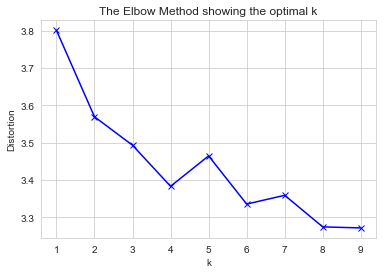

In [195]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# create new plot and data
plt.plot()
X = df_cluster
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* Attempts to find the optimal cluster count based on cluster density & distance - fluctuates slightly over runs

In [196]:
km = KMeans(n_clusters=4).fit(df_cluster)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_cluster.index.values
cluster_map['cluster'] = km.labels_
cluster_map.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68374 entries, 0 to 68373
Data columns (total 2 columns):
data_index    68374 non-null int64
cluster       68374 non-null int32
dtypes: int32(1), int64(1)
memory usage: 801.3 KB


In [197]:
#cluster_map.drop('data_index',axis = 1, inplace = True)
df_outlier_updated = df_outlier_updated.reset_index()

df_outlier_updated = pd.concat([df_outlier_updated, cluster_map], axis=1)
df_outlier_updated.head()

,index,UserId,CountryShortName,IsTouchEnabled,FormFactor,NumberOfActiveDaysInPhotosApp,TotalLaunchCount,LaunchViaCropPicker,LaunchViaWindowsCameraRoll,LaunchViaLumiaCameraRoll,...,AgeGroup,Gender,NumberOfActiveDaysInOS,TotalTimeInAllAppsInMins,TotalTimeInAllPhotosAppsInMins,MostUsedPhotoApp,TotalTimeInPhotosAppInMins,TotalTimeInOtherPhotosAppsInMins,data_index,cluster
0,0,1,Bangladesh,0,Other,1,2,0,0,0,...,[18-25),M,16,3713,1,Photos,1,0,0,0
1,2,3,China,0,Desktop,1,1,0,0,0,...,[35-50),M,28,12811,0,Photos,0,0,2,0
2,3,4,Slovakia,0,Notebook,2,5,0,0,0,...,>=50,M,16,1489,6,Photos,6,0,3,0
3,4,5,Morocco,0,Notebook,5,8,0,0,0,...,[18-25),M,30,12296,17,Photos,8,9,4,0
4,5,6,United States,0,Desktop,1,3,0,0,0,...,[25-35),F,21,3138,1,App115,0,1,5,0


# 6. Result Analysis

In [217]:
#adjusts for outliers
df_clusters = df_outlier_updated.groupby('cluster')['TotalTimeInAllAppsInMins','TotalTimeInPhotosAppInMins',
                                          'TotalTimeInOtherPhotosAppsInMins'
                                          ,'TotalTimeInAllPhotosAppsInMins','NumberOfImages','NumberOfVideos',
                                         'NumberOfActiveDaysInOS','FromLocal','FromOneDrive', 'TotalFilesInCollection'].apply(lambda x : x.astype(int).sum())
df2022=df_outlier_updated['cluster'].value_counts().sort_index().to_frame()
df_clusters['total_people'] = df2022['cluster']


df2122 = df_outlier_updated.groupby('cluster')['MostUsedPhotoApp'].value_counts().to_frame()
df2122 = df_outlier_updated.groupby('cluster')['MostUsedPhotoApp'].first().to_frame()
df_clusters['Most_Used'] = df2122['MostUsedPhotoApp']

df_aged = df_outlier_updated[df_outlier_updated['Gender']=='M']
df20222=df_aged['cluster'].value_counts().sort_index().to_frame()
df_clusters['total_males'] = df20222['cluster']

df_aged = df_outlier_updated[df_outlier_updated['Gender']=='F']
df202222=df_aged['cluster'].value_counts().sort_index().to_frame()
df_clusters['total_females'] = df202222['cluster']

df_clusters = df_clusters.reset_index()
df_clusters['Average_Days'] = df_clusters['NumberOfActiveDaysInOS'] / df_clusters['total_people']
df_clusters['Average_All_Apps'] = df_clusters['TotalTimeInAllAppsInMins'] / df_clusters['total_people']
df_clusters['Average_Photos'] = df_clusters['TotalTimeInPhotosAppInMins'] / df_clusters['total_people']
df_clusters['Average_Others'] = df_clusters['TotalTimeInOtherPhotosAppsInMins'] / df_clusters['total_people']
df_clusters['Average_Total'] = df_clusters['TotalFilesInCollection'] / df_clusters['total_people']
df_clusters['Average_Pics'] = df_clusters['NumberOfImages'] / df_clusters['total_people']
df_clusters['Average_OneDrive'] = df_clusters['FromOneDrive'] / df_clusters['total_people']
df_clusters['Average_Local'] = df_clusters['FromLocal'] / df_clusters['total_people']
df_clusters['Photo_Other_Deficit'] = (df_clusters['Average_Photos'] - df_clusters['Average_Others']) / (df_clusters['Average_Photos'] + df_clusters['Average_Others'])
df_clusters['Local_One_Drive_Deficit'] = (df_clusters['Average_OneDrive'] - df_clusters['Average_Local']) / (df_clusters['Average_OneDrive'] + df_clusters['Average_Local'])
df_clusters['PhotoApp'] = df_clusters['TotalTimeInPhotosAppInMins']  / df_clusters['TotalTimeInAllAppsInMins'] 
df_clusters.head(20)

,cluster,TotalTimeInAllAppsInMins,TotalTimeInPhotosAppInMins,TotalTimeInOtherPhotosAppsInMins,TotalTimeInAllPhotosAppsInMins,NumberOfImages,NumberOfVideos,NumberOfActiveDaysInOS,FromLocal,FromOneDrive,...,Average_All_Apps,Average_Photos,Average_Others,Average_Total,Average_Pics,Average_OneDrive,Average_Local,Photo_Other_Deficit,Local_One_Drive_Deficit,PhotoApp
0,0,270761750,343400,429986,773386,48716335,964964,985987,28538587,19109266,...,4816.881927,6.109125,7.649499,884.235594,866.669068,339.955987,507.704666,-0.111957,-0.197896,0.001268
1,1,58164064,326347,137700,464047,6536864,133911,175528,4793735,1568178,...,7480.908553,41.973891,17.710611,858.232412,840.754212,201.694920,616.557556,0.406526,-0.507011,0.005611
2,2,7126173,14955,23138,38093,29495428,571673,22250,14932681,14236289,...,6543.776860,13.732782,21.247016,27672.452709,27084.874197,13072.808999,13712.287420,-0.214816,-0.023874,0.002099
3,3,56793733,50567,802358,852925,3544896,51911,73285,2485430,987056,...,17215.438921,15.327978,243.212489,1090.542286,1074.536526,299.198545,753.388906,-0.881427,-0.431499,0.000890


### Initial thoughts: 
* Cluster 0 users have lowest total app usage & relatively even split for small photo & other usage - probably general user
    * second smallest photo apps deficit
* Cluster 1 use photo apps way more than any other group
    * low pic count - comparable to cluster 0 
* Cluster 2 are super storerers that spend second lowest time in all apps & have low photo apps usage
* Cluster 3 use other apps conistently more 
    * by far highest photo apps deficit

In [218]:
print(df_outlier_updated.groupby('cluster')['Gender'].value_counts())

cluster  Gender
0        M         46187
         F         10024
1        M          6312
         F          1463
2        M           951
         F           138
3        M          2938
         F           361
Name: Gender, dtype: int64


* Cluster 3 power users lean heavily male
* Cluster 2, super savers, the second most active also has a low female population. 
* Cluster 0 & 1 are more balanced at a 5-1 ratio

In [220]:
print(df_outlier_updated.groupby('cluster')['AgeGroup'].value_counts())

cluster  AgeGroup
0        [25-35)     22643
         [35-50)     11991
         [18-25)     11676
         >=50         5415
         <18          4486
1        [25-35)      3350
         [18-25)      1617
         [35-50)      1454
         <18           757
         >=50          597
2        [35-50)       421
         [25-35)       350
         >=50          163
         [18-25)       121
         <18            34
3        [25-35)      1311
         [18-25)       859
         [35-50)       643
         >=50          255
         <18           231
Name: AgeGroup, dtype: int64


* The more active groups, 0 & 2, skew a bit older & male
* following gender tables back this up

In [208]:
print(df_outlier_updated[df_outlier_updated['Gender'] != 'M'].groupby('cluster')['AgeGroup'].value_counts())

cluster  AgeGroup
0        [25-35)     4219
         <18         2027
         [18-25)     1768
         [35-50)     1413
         >=50         597
1        [25-35)      459
         <18          407
         [18-25)      284
         [35-50)      246
         >=50          67
2        [25-35)       59
         [35-50)       41
         >=50          14
         <18           13
         [18-25)       11
3        [25-35)      157
         <18           88
         [18-25)       68
         [35-50)       37
         >=50          11
Name: AgeGroup, dtype: int64


In [209]:
print(df_outlier_updated[df_outlier_updated['Gender'] != 'F'].groupby('cluster')['AgeGroup'].value_counts())

cluster  AgeGroup
0        [25-35)     18424
         [35-50)     10578
         [18-25)      9908
         >=50         4818
         <18          2459
1        [25-35)      2891
         [18-25)      1333
         [35-50)      1208
         >=50          530
         <18           350
2        [35-50)       380
         [25-35)       291
         >=50          149
         [18-25)       110
         <18            21
3        [25-35)      1154
         [18-25)       791
         [35-50)       606
         >=50          244
         <18           143
Name: AgeGroup, dtype: int64


In [221]:
print(df_outlier_updated[df_outlier_updated['cluster'] == 0].groupby('AgeGroup')['FormFactor'].value_counts())

AgeGroup  FormFactor 
<18       Notebook        2291
          Desktop         1963
          Other            141
          AllInOne          44
          LargeTablet       43
          SmallTablet        4
>=50      Notebook        2605
          Desktop         2293
          Other            216
          LargeTablet      204
          AllInOne          81
          SmallTablet       16
[18-25)   Notebook        6880
          Desktop         4149
          Other            375
          LargeTablet      176
          AllInOne          75
          SmallTablet       21
[25-35)   Notebook       12441
          Desktop         8505
          Other            911
          LargeTablet      460
          AllInOne         308
          SmallTablet       18
[35-50)   Notebook        6229
          Desktop         4594
          LargeTablet      490
          Other            449
          AllInOne         187
          SmallTablet       42
Name: FormFactor, dtype: int64


In [222]:
print(df_outlier_updated[df_outlier_updated['cluster'] == 1].groupby('AgeGroup')['FormFactor'].value_counts())

AgeGroup  FormFactor 
<18       Desktop         367
          Notebook        365
          Other            16
          AllInOne          7
          LargeTablet       2
>=50      Notebook        298
          Desktop         265
          Other            17
          LargeTablet       9
          AllInOne          6
          SmallTablet       2
[18-25)   Notebook        971
          Desktop         579
          Other            44
          LargeTablet      12
          AllInOne         10
          SmallTablet       1
[25-35)   Notebook       1923
          Desktop        1293
          Other            68
          AllInOne         36
          LargeTablet      26
          SmallTablet       4
[35-50)   Notebook        771
          Desktop         599
          Other            37
          LargeTablet      34
          AllInOne         13
Name: FormFactor, dtype: int64


* Cluster 1 is a potential growth group. 
* They have highest photo app current usage & are relatively well balanced age & gender. 
* They seem to favor notebooks. 
* Development may want to be focused on laptop friendly features. 
* Cluster 0 also leans decisively towards notebooks so you could potentially appeal to the general user & high growth users

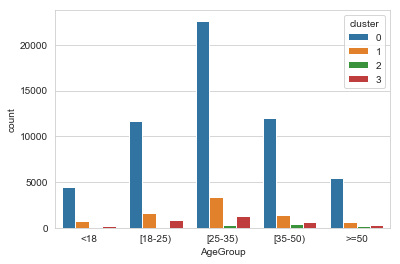

In [224]:
ax = sns.countplot(x="AgeGroup", hue = 'cluster',data=df_outlier_updated, order=["<18", "[18-25)",'[25-35)','[35-50)','>=50'])

* Graphic confirms that cluster 0 & 1 lean towards a more general population distribution. 

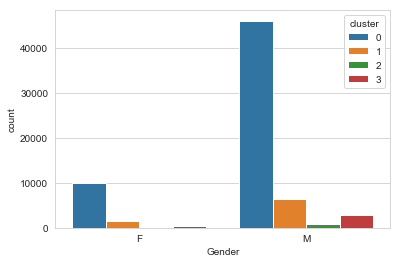

In [225]:
ax = sns.countplot(x="Gender", hue = 'cluster',data=df_outlier_updated)

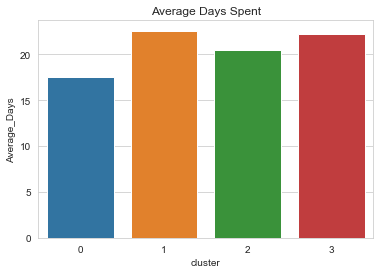

In [226]:
plt.title("Average Days Spent")
sns.barplot(x="cluster", y="Average_Days", data=df_clusters)

* Shows engagmenet level by cluster - active number of days. 
* Cluster 1 shows greater level of engagement than the power users

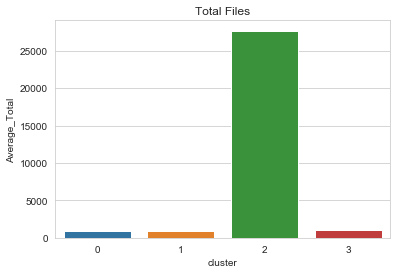

In [228]:
plt.title("Total Files")
sns.barplot(x="cluster", y="Average_Total", data=df_clusters)

* I suspect there could be outlier issues in cluster 0. Worth investigating further before making concrete decisions. 
    * This cluster leans older so this is potentially a couple very proud grandparents. 
* Total file count for cluster 2 confirms they are already heavy users. 

# 7. Conclusion

1. Final recommendation would be to target cluster 3. A lot of their attributes match up with the largest group cluster 1 so you could appeal to the 2 largest growth groups by developing features for 3. Cluster 2 are probably some sort of photoshop or advanced picture editor user so it's debatable if it's worth the time to compete with that product. 
2. One thing I would like to dig in further is what affect country has on it. There would need to be some consolidation under region or economic development level. 
3. Primary concern with the model is that it doesnt accurately capture the full dataset since clustering can't take full advantage of categorical data. With more time I'd be interested in adding a k-modes model which can handle categorical & numerical data. Photo storage on the computer doesn't seem to be the norm with such an emphais on mobile so the data could be biased & not generalize to actual users. 